**EDA**

Here we clean the data:

1. remove unnecessary columns
2. change data types 
3. fill missing values 
4. round data 

In [48]:
#import packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
import sys
!{sys.executable} -m pip install xgboost

In [49]:
from xgboost import XGBRegressor

In [5]:
# read in the data
df = pd.read_csv("../data/Train.csv", sep = ',')

**Delete unwanted columns**

In [6]:
columns_to_delete = ['Place_ID X Date', 
                     'target_min', 
                     'target_max',
                     'target_variance', 
                     'target_count', 
                     'relative_humidity_2m_above_ground', 
                     'L3_NO2_NO2_slant_column_number_density',
                     'L3_NO2_stratospheric_NO2_column_number_density',  
                     'L3_SO2_SO2_slant_column_number_density',
                     #removing all sensor data and zenith and azimuth angle data
                     'L3_NO2_sensor_altitude', 
                     'L3_NO2_sensor_azimuth_angle',
                     'L3_NO2_sensor_zenith_angle', 
                     'L3_NO2_solar_azimuth_angle',
                     'L3_NO2_solar_zenith_angle',                  
                     'L3_O3_sensor_azimuth_angle',
                     'L3_O3_sensor_zenith_angle', 
                     'L3_O3_solar_azimuth_angle',
                     'L3_O3_solar_zenith_angle',
                     'L3_CO_sensor_altitude', 
                     'L3_CO_sensor_azimuth_angle',
                     'L3_CO_sensor_zenith_angle', 
                     'L3_CO_solar_azimuth_angle',
                     'L3_CO_solar_zenith_angle',
                     'L3_HCHO_sensor_zenith_angle', 
                     'L3_HCHO_solar_azimuth_angle',
                     'L3_HCHO_sensor_azimuth_angle',
                     'L3_HCHO_solar_zenith_angle',
                     'L3_CLOUD_sensor_azimuth_angle', 
                     'L3_CLOUD_sensor_zenith_angle',
                     'L3_CLOUD_solar_azimuth_angle', 
                     'L3_CLOUD_solar_zenith_angle',
                     'L3_AER_AI_sensor_altitude', 
                     'L3_AER_AI_sensor_azimuth_angle',
                     'L3_AER_AI_sensor_zenith_angle', 
                     'L3_AER_AI_solar_azimuth_angle',
                     'L3_AER_AI_solar_zenith_angle',
                     'L3_SO2_sensor_azimuth_angle', 
                     'L3_SO2_sensor_zenith_angle',
                     'L3_SO2_solar_azimuth_angle', 
                     'L3_SO2_solar_zenith_angle', 
                     'L3_CH4_sensor_azimuth_angle', 
                     'L3_CH4_sensor_zenith_angle',
                     'L3_CH4_solar_azimuth_angle', 
                     'L3_CH4_solar_zenith_angle',
                     'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
                     'L3_CH4_aerosol_height',
                     'L3_CH4_aerosol_optical_depth'  
                    ]

df_reduced = df.drop(columns = columns_to_delete, axis = 1)

**Split data into train and test sets 80/20 split**

In [7]:
RSEED = 9 

# Define x/y
X = df_reduced 
y = np.array(X.pop('target'))

# split train/test data
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = RSEED)

**Check for remaining columns, data types and null values**

In [8]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24445 entries, 29510 to 24958
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 24445 non-null  object 
 1   Place_ID                                             24445 non-null  object 
 2   precipitable_water_entire_atmosphere                 24445 non-null  float64
 3   specific_humidity_2m_above_ground                    24445 non-null  float64
 4   temperature_2m_above_ground                          24445 non-null  float64
 5   u_component_of_wind_10m_above_ground                 24445 non-null  float64
 6   v_component_of_wind_10m_above_ground                 24445 non-null  float64
 7   L3_NO2_NO2_column_number_density                     22688 non-null  float64
 8   L3_NO2_absorbing_aerosol_index                       22688 non-null

In [9]:
train_X.isna().sum()

Date                                                      0
Place_ID                                                  0
precipitable_water_entire_atmosphere                      0
specific_humidity_2m_above_ground                         0
temperature_2m_above_ground                               0
u_component_of_wind_10m_above_ground                      0
v_component_of_wind_10m_above_ground                      0
L3_NO2_NO2_column_number_density                       1757
L3_NO2_absorbing_aerosol_index                         1757
L3_NO2_cloud_fraction                                  1757
L3_NO2_tropopause_pressure                             1758
L3_NO2_tropospheric_NO2_column_number_density          6898
L3_O3_O3_column_number_density                          224
L3_O3_O3_effective_temperature                          224
L3_O3_cloud_fraction                                    224
L3_CO_CO_column_number_density                         4317
L3_CO_H2O_column_number_density         

**Checking plots of all features**

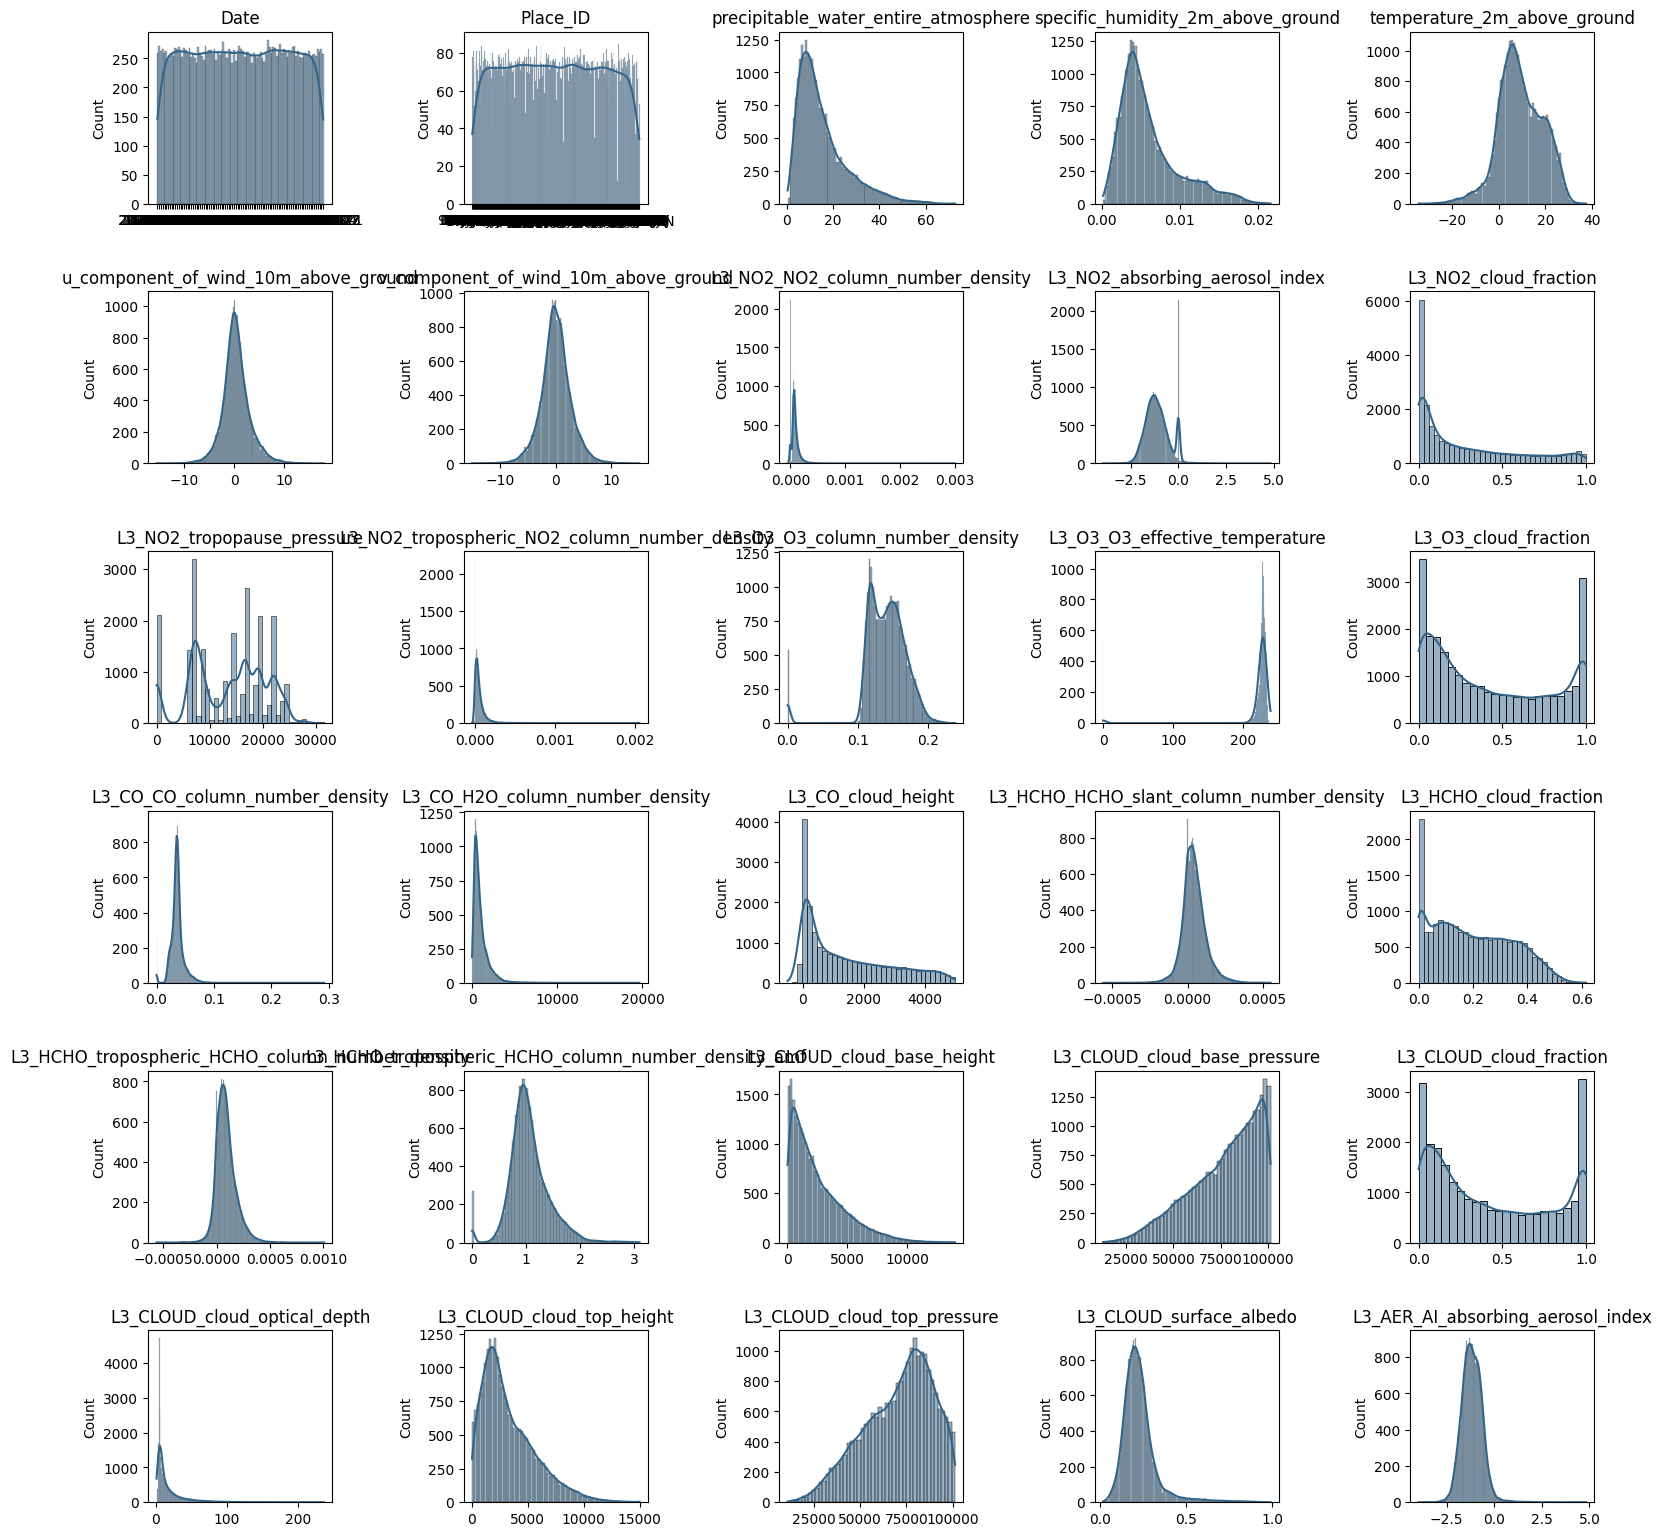

In [8]:
# Plot histograms for train data
fig, ax = plt.subplots(6, 5, figsize=(16, 16))
count = 0

for i in range(6):
    for j in range(5):
        # Check if there are more items to plot
        if count < len(train_X.columns):
            item = train_X.columns[count]
            sns.histplot(train_X[item], kde=True, ax=ax[i][j], color='#33658A').set(title=item, xlabel='')
            count += 1
        else:
            # If no more items, hide the remaining subplots
            ax[i][j].set_visible(False)

fig.tight_layout(pad=3)

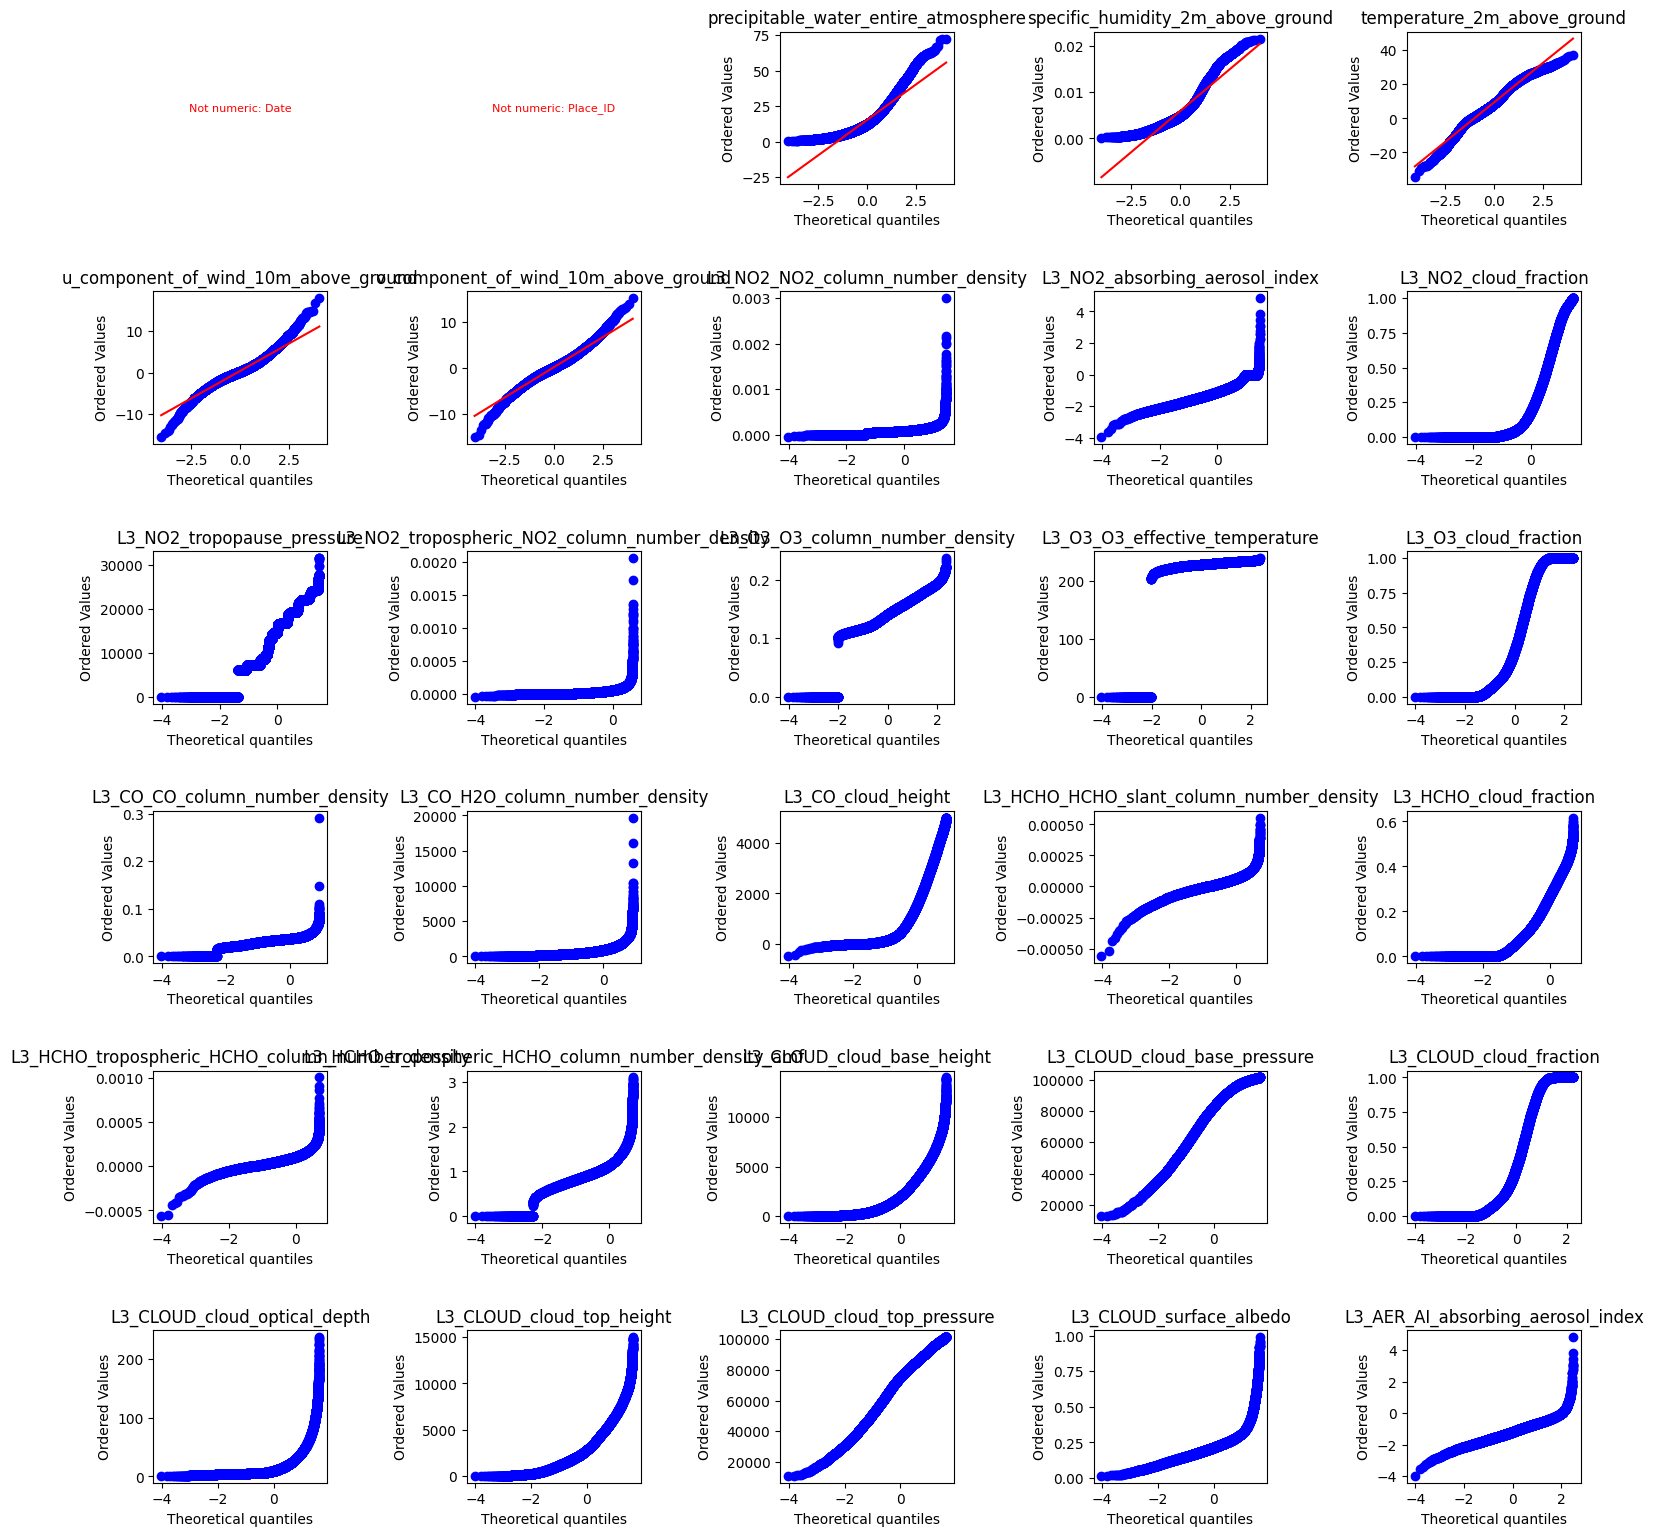

In [51]:
# Plot Q-Q plots for train data
fig, ax = plt.subplots(6, 5, figsize=(16, 16))
count = 0

for i in range(6):
    for j in range(5):
        # Check if there are more items to plot
        if count < len(train_X.columns):
            item = train_X.columns[count]

            # Check if the data is numeric
            if pd.api.types.is_numeric_dtype(train_X[item]):
                stats.probplot(train_X[item], dist='norm', plot=ax[i][j])
                ax[i][j].set_title(item)
            else:
                # If the data is not numeric, print a message
                ax[i][j].text(0.5, 0.5, f"Not numeric: {item}", ha='center', va='center', fontsize=8, color='red')
                ax[i][j].axis('off')

            count += 1
        else:
            # If no more items, hide the remaining subplots
            ax[i][j].set_visible(False)

fig.tight_layout(pad=3)
plt.show()

In [10]:
# Custom transformer for interpolation
class InterpolateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, method='linear', limit_direction='both'):
        self.method = method
        self.limit_direction = limit_direction

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.interpolate(method=self.method, limit_direction=self.limit_direction)

**First pipeline - preprocessing with data imputation using interpolation and scaling using a robust scaler**

In [11]:
# impute missing values by using interpolate in SimpleImputer and scaling the features using a StandardScaler
# Separate preprocessing for numerical features
num_preprocessing = Pipeline(steps=[
    ('imputing', InterpolateTransformer(method='linear', limit_direction='both')), 
    ('robust scaler', RobustScaler()),
    ('select_k_best', SelectKBest(score_func=f_regression, k=12))
])

num_preprocessing

Pipeline(steps=[('imputing', InterpolateTransformer()),
                ('robust scaler', RobustScaler()),
                ('select_k_best',
                 SelectKBest(k=12,
                             score_func=<function f_regression at 0x12ff86de0>))])

**Column transformer that drop place id and date**

In [12]:
# Create a ColumnTransformer for the entire preprocessing
preprocessing = ColumnTransformer([
    ('transformations', num_preprocessing, X.columns.drop(['Place_ID', 'Date'])),
    #('select_k_best', feature_selection_pipeline, X.columns.drop(['Place_ID', 'Date']))
])

preprocessing

ColumnTransformer(transformers=[('transformations',
                                 Pipeline(steps=[('imputing',
                                                  InterpolateTransformer()),
                                                 ('robust scaler',
                                                  RobustScaler()),
                                                 ('select_k_best',
                                                  SelectKBest(k=12,
                                                              score_func=<function f_regression at 0x12ff86de0>))]),
                                 Index(['precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_...
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
       'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction'],
      dtype='object'))])

**print out the k best features**

In [13]:
"""new_x = preprocessing.fit_transform(train_X)
transformed_columns = preprocessing.get_feature_names_out(train_X.columns)
new_x = pd.DataFrame(new_x, columns=transformed_columns)

# Features for feature importance
features = list(new_x.columns)
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(10)"""

"new_x = preprocessing.fit_transform(train_X)\ntransformed_columns = preprocessing.get_feature_names_out(train_X.columns)\nnew_x = pd.DataFrame(new_x, columns=transformed_columns)\n\n# Features for feature importance\nfeatures = list(new_x.columns)\nfi = pd.DataFrame({'feature': features,\n                   'importance': tree.feature_importances_}).                    sort_values('importance', ascending = False)\nfi.head(10)"

**Stacking regressor**

In [33]:
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
}

Linear_model = LinearRegression()
KNeighbors_model = KNeighborsRegressor(n_neighbors=5)
Xgb_model = XGBRegressor(random_state=RSEED)

estimators = [
     ('lr', Linear_model),
     ('knn', KNeighbors_model),
     ('xbg', Xgb_model),
 ]

stack = StackingRegressor(
     estimators=estimators,
     final_estimator=RandomForestRegressor(random_state=RSEED, n_jobs=-1)
 )

stack

#TypeError: BaseEstimator.get_params() missing 1 required positional argument: 'self'

StackingRegressor(estimators=[('lr', RidgeCV(alphas=[0.001, 0.01, 0.1, 1])),
                              ('knn', KNeighborsRegressor()),
                              ('xbg',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_p...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=9, ...))],
                  final_estimator=RandomForestRegressor(n_jobs=-1,
                                                        random_state=9))

**Stacking pipeline that uses the stacking regressor**

In [34]:
stack_pipeline = Pipeline([
    ('preprocessor', preprocessing),
    ('rf', stack)  # Use the stacking regressor here
])

stack_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('transformations',
                                                  Pipeline(steps=[('imputing',
                                                                   InterpolateTransformer()),
                                                                  ('robust '
                                                                   'scaler',
                                                                   RobustScaler()),
                                                                  ('select_k_best',
                                                                   SelectKBest(k=12,
                                                                               score_func=<function f_regression at 0x12ff86de0>))]),
                                                  Index(['precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground', 'temperature...
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=9, ...))],
                                   final_estimator=RandomForestRegressor(n_jobs=-1,
                                                                         random_state=9)))])

**Evaluation metric - rmse**

In [35]:
# Define RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

In [42]:
stack_pipeline.fit(train_X,train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('transformations',
                                                  Pipeline(steps=[('imputing',
                                                                   InterpolateTransformer()),
                                                                  ('robust '
                                                                   'scaler',
                                                                   RobustScaler()),
                                                                  ('select_k_best',
                                                                   SelectKBest(k=12,
                                                                               score_func=<function f_regression at 0x12ff86de0>))]),
                                                  Index(['precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground', 'temperature...
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=9, ...))],
                                   final_estimator=RandomForestRegressor(n_jobs=-1,
                                                                         random_state=9)))])

In [43]:
# Evaluate the model on the test set
y_pred = stack_pipeline.predict(test_X)
test_rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f"Test Set RMSE: {test_rmse}")

Test Set RMSE: 37.45401532453449


In [44]:
# Evaluate the model on the test set
y_pred_train = stack_pipeline.predict(train_X)
test_rmse = np.sqrt(mean_squared_error(train_y, y_pred_train))
print(f"Test Set RMSE: {test_rmse}")

Test Set RMSE: 31.23825477242344


**Random search**

In [39]:
# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'stacking__dt__fit_intercept': [True, False],  # LinearRegression
    'stacking__knn__n_neighbors': randint(1, 10),   # KNeighborsRegressor
    'stacking__rf__n_estimators': randint(50, 200),  # RandomForestRegressor
    'stacking__rf__max_depth': randint(3, 10)  # RandomForestRegressor
}

In [40]:
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(stack_pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring=rmse_scorer, verbose =3, random_state=RSEED)

**Fitting the random search**

In [41]:
# Fit the model
random_search.fit(train_X, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Invalid parameter 'stack' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('transformations',
                                                  Pipeline(steps=[('imputing',
                                                                   InterpolateTransformer()),
                                                                  ('robust '
                                                                   'scaler',
                                                                   RobustScaler()),
                                                                  ('select_k_best',
                                                                   SelectKBest(k=12,
                                                                               score_func=<function f_regression at 0x12ff86de0>))]),
                                                  Index(['precipitable_water_entire_atmosphere',
       'specific_humidity_2m_above_ground', 'temperature...
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=9, ...))],
                                   final_estimator=RandomForestRegressor(n_jobs=-1,
                                                                         random_state=9)))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [18]:
# Print the best parameters
print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'rf__n_estimators': 200, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 'rf__max_depth': None}


In [19]:
# Evaluate the model on the test set
y_pred = random_search.predict(test_X)
test_rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f"Test Set RMSE: {test_rmse}")

Test Set RMSE: 35.086404286150724


In [ ]:
#trial 1 - without feature engineering
#Test Set RMSE: 31.546270354431556
#trial 2 - with feature engineering - selectkbest
#Test Set RMSE: 31.30329402687831
#trial 3 - select k best
#Test Set RMSE: 35.086404286150724
